In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import add_dummy_feature
from sklearn.preprocessing import StandardScaler

### Persiapan Dataset
#### Dataset yang digunakan merupakan Diabetes Health Indicator

In [2]:
dataframe = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
dataframe = dataframe.iloc[:,:10]
dataframe

X = dataframe.iloc[:,1:10]
y = dataframe['Diabetes_012']

### dikarenakan didalam dataset tidak terdapat categorical dataset, maka tidak dilakukan one hot encoding

## Beberapa note untuk dataset
#### Diabetes_012 (0 = No Diabetes, 1 = Prediabetes, 2 = diabetes
#### HighBp (0 = not high, 1 = High Bp, Bp stand for Blood Preasure)
#### HighChol (0 = Not high, 1 = high cholesterol)
#### CholCheck( 0 = no cholesterol check in 5 years, 1  = have done cholesterol check in 5 years atleast one time)
#### BMI (body mass index)
#### Smoker(0= no, 1 = yes)
#### Stroke (0 = no, 1 = yes)
#### HearthDiseases(0 = no, 1 = yes)
#### PhysActivity(Physical Activity in past 30 days - not including jobs 0 = no, 1 = yes)
#### Fruits (consume fruite atleast 1 or more times per day, 0 = no, 1 = yes)

### Data Preparation

In [3]:
dataframe.shape


(253680, 10)

In [4]:
dataframe.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
dtype: int64

In [90]:
dataframe.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Visualisasi data

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diabetes_012', ylabel='BMI'>

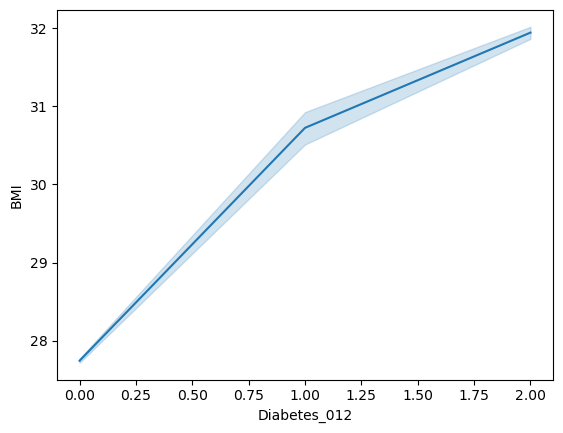

In [6]:
import seaborn as sns
import pandas

sns.lineplot( dataframe['Diabetes_012'], dataframe['BMI'])

#### Dalam visualisasi data ini, kita bisa melihat semakin tinggi BMI, maka individu tersebut cendrung memiliki diabetes tipe 2

<AxesSubplot:xlabel='Diabetes_012', ylabel='PhysActivity'>

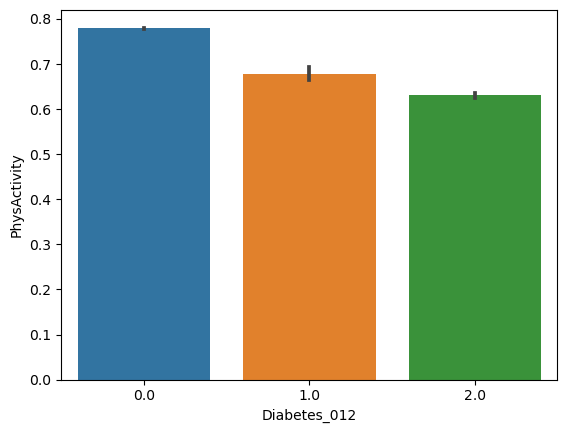

In [7]:
sns.barplot(x ="Diabetes_012", y ="PhysActivity", data = dataframe)

#### Dalam visualisasi ini kita bisa melihat bahwa semakin individu dengan phyisical activity yang mengarah ke satu cendrung memiliki Diabetes tipe 0

<AxesSubplot:xlabel='Fruits', ylabel='Count'>

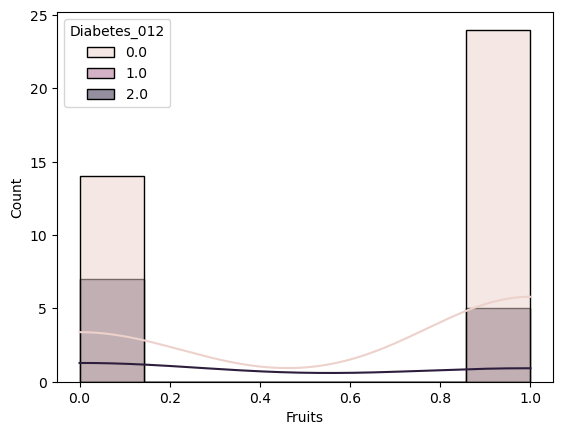

In [93]:
sns.histplot(x=dataframe['Fruits'].head(50), data=dataframe, kde=True, hue='Diabetes_012')

#### Dalam Visualisasi ini kita bisa melihat jumlah individu yang mengkonsumsi buah dan yang tidak, dan kita bisa melihat jumlah yang mendapatkan diabetes tipe 0-1-2

### Pembuatan Model
#### Logistic regression dengan solver saga dan penalty l2 atau ridge

In [11]:
model = LogisticRegression(solver = "saga", penalty = "l2")
scaler = StandardScaler()

### Pemisahan dataset dan penggunaan standard scaler

In [117]:

X_train=np.array(dataframe['BMI'])
X_train=X_train.reshape(-1,1)
X_train = scaler.fit_transform(X_train)
y_train = np.array(dataframe['Diabetes_012'])

X_train, X_test, y_train, y_test=train_test_split(X_train,y_train,test_size=0.33,random_state=42)

### Model Training

In [27]:
model.fit(X_train, y_train)

LogisticRegression(solver='saga')

### Hasil score model dan conffusion matrix

array([[46944,     0,   362],
       [ 1034,     0,    11],
       [ 7680,     0,    58]], dtype=int64)

In [100]:
model.score(X_train, y_train)

0.8393551613567499

In [102]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[70213,     0,   420],
       [ 1525,     0,    17],
       [11365,     0,   175]], dtype=int64)

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91     70633
         1.0       0.00      0.00      0.00      1542
         2.0       0.29      0.02      0.03     11540

    accuracy                           0.84     83715
   macro avg       0.38      0.34      0.31     83715
weighted avg       0.75      0.84      0.77     83715



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
model.intercept_

array([ 1.92153888, -1.96061245,  0.03907357])

In [105]:
model.coef_

array([[-0.32926476],
       [ 0.11747312],
       [ 0.21179163]])

### ROC Curve

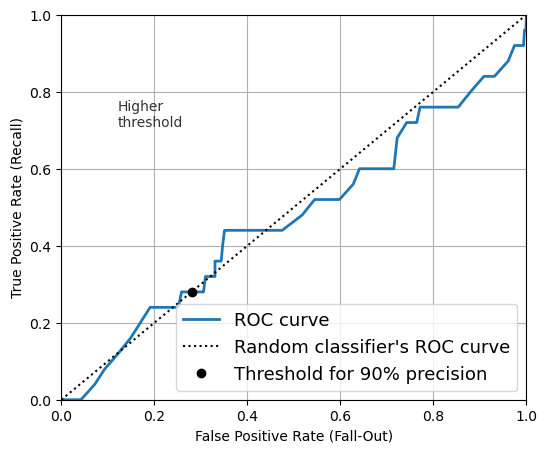

In [21]:
from sklearn.metrics import roc_curve
from sklearn.svm import LinearSVC

y_scores = model.predict_proba(X_test)
y_scores = np.array(y_scores.reshape(-1,1))
fpr, tpr, thresholds = roc_curve(y_train[:1000], y_scores[:1000], pos_label=1)
threshold_for_81_precision = 0.81
y_train_pred_81 = (y_scores >= threshold_for_81_precision)

idx_for_threshold_at_81 = (thresholds <= threshold_for_81_precision).argmax()
tpr_81, fpr_81 = tpr[idx_for_threshold_at_81], fpr[idx_for_threshold_at_81]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_81], [tpr_81], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7

plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

### Validation Curve

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

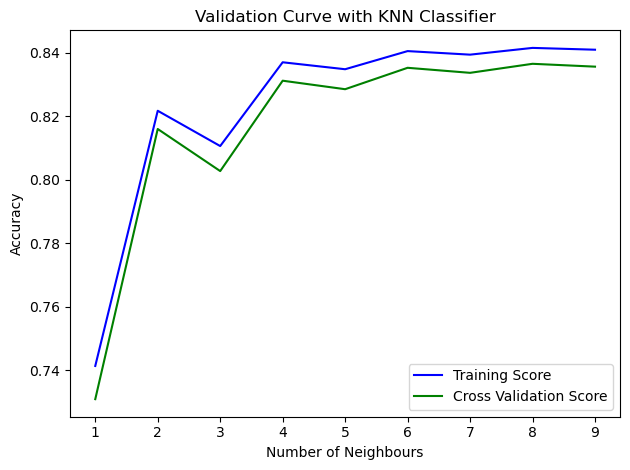

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

param_range = np.arange(1,10,1)

train_score, test_score = validation_curve(KNeighborsClassifier(), X, y,
                                       param_name = "n_neighbors",
                                       param_range = param_range,
                                        cv = 5, scoring = "accuracy")

mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)

mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

plt.plot(param_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(param_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

#### Dilihat dari validation curve, model atau data yang dilatih mengalami overfitting

### Model Logistic Regression dengan parameter solver = "saga", penalty = "l1" atau lasso

In [74]:

model2 = LogisticRegression(solver = "saga", penalty = "l1")

X_train2 = np.array(dataframe['BMI'])
X_train2 = X_train.reshape(-1,1)
X_train2 = scaler.fit_transform(X_train)
y_train2 = np.array(dataframe['Diabetes_012'])

X_train2, X_test2, y_train2, y_test2=train_test_split(X_train2, y_train2[:169965], test_size=0.33,random_state=42)

model2.fit(X_train2, y_train2)


LogisticRegression(penalty='l1', solver='saga')

In [75]:
y_pred2 = model.predict(X_test2)

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test2[:56089], y_pred2))

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91     47446
         1.0       0.00      0.00      0.00       986
         2.0       0.15      0.01      0.02      7657

    accuracy                           0.84     56089
   macro avg       0.33      0.33      0.31     56089
weighted avg       0.74      0.84      0.77     56089



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [114]:
print("Score dari model kedua ini merupakan:", model2.score(X_train2, y_train2))

Score dari model kedua ini merupakan: 0.844611682883136


In [115]:
model.score(X_train, y_train)

0.8393551613567499